In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Neha-Chiluka/deeplearning/refs/heads/main/tensorflow/data/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4585,2014-07-07 00:00:00,486895.000000,3.0,1.00,1890,3330,1.5,0,0,4,1390,500,1901,0,4324 Dayton Ave N,Seattle,WA 98103,USA
4372,2014-05-08 00:00:00,237333.333333,3.0,2.75,3010,1842,2.0,0,0,3,3010,0,2011,0,2868 258th Pl SE,Sammamish,WA 98075,USA
3654,2014-06-30 00:00:00,436500.000000,4.0,2.50,2290,11173,2.0,0,0,4,2290,0,1988,0,133rd Ave SE,Renton,WA 98058,USA
1960,2014-06-05 00:00:00,395000.000000,4.0,3.00,1980,7931,1.0,0,0,4,1160,820,1983,0,16723 Corliss Pl N,Shoreline,WA 98133,USA
409,2014-05-09 00:00:00,505000.000000,3.0,2.50,2100,5824,2.0,0,2,3,2100,0,1999,0,7418 Dogwood Ln SE,Snoqualmie,WA 98065,USA


In [ ]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [ ]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [ ]:
def remap_location(data: pd.DataFrame,
                   location: str,
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [ ]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
3513,330675.0,4.0,3.00,1930,3031,1.0,0,0,3,1200,730,Rare,15,0,0,0
2339,465000.0,4.0,2.50,2090,9702,1.0,0,0,5,1320,770,Shoreline,56,0,0,0
653,565000.0,4.0,2.50,2240,14667,2.0,0,0,4,2240,0,Rare,32,0,0,0
4182,275000.0,4.0,2.00,2030,8426,2.0,0,0,3,2030,0,Rare,77,0,0,0
4581,473200.0,3.0,1.50,1740,4200,1.5,0,0,4,1640,100,Seattle,101,0,0,0
1878,875000.0,4.0,2.75,3790,10669,2.0,0,0,3,3790,0,Sammamish,22,0,0,0
579,350000.0,3.0,2.50,2010,14298,2.0,0,0,3,2010,0,Rare,44,1,0,1
1133,1030000.0,3.0,4.00,3880,13095,2.0,0,3,3,3700,180,Kirkland,12,0,0,0
508,500000.0,2.0,2.25,1290,1334,3.0,0,0,3,1290,0,Seattle,14,0,0,0
208,387000.0,3.0,1.00,1230,9568,1.0,0,0,5,1230,0,Rare,59,0,0,0


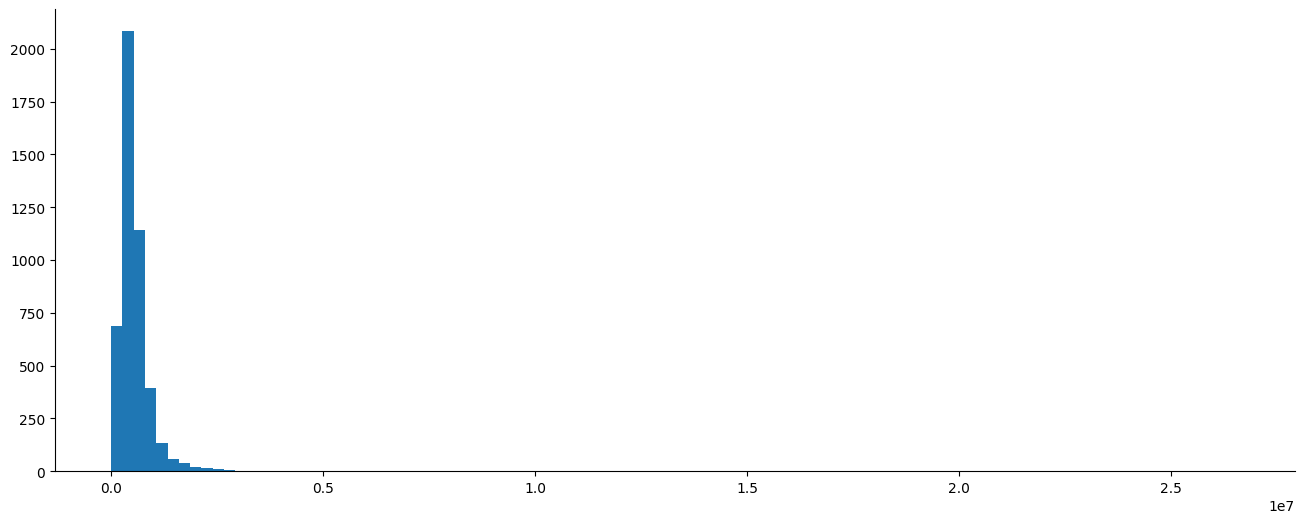

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

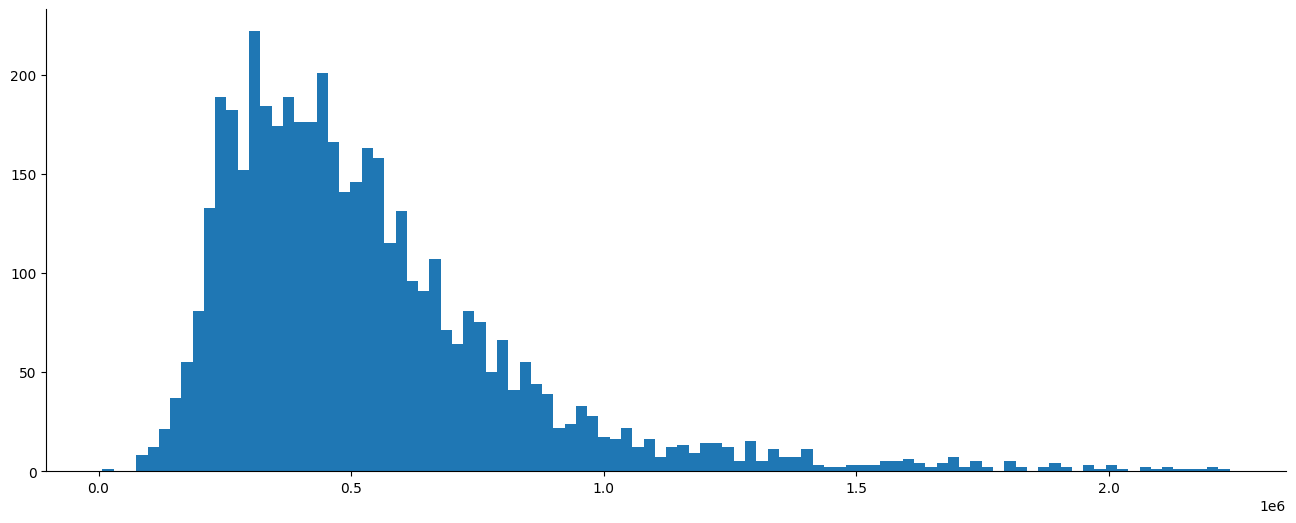

In [ ]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(),
        ['sqft_living', 'sqft_lot','sqft_above',
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'),
        ['bedrooms', 'bathrooms', 'floors',
         'view', 'condition'])
)

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 614602.9375 - rmse: 614603.2500
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 519247.1875 - rmse: 519245.6562
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 270941.7500 - rmse: 270942.1562
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 249385.0156 - rmse: 249385.3906
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 237285.0469 - rmse: 237285.3750
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 229753.0156 - rmse: 229753.2812
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 224709.1094 - rmse: 224709.3281
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 221127.7656 - rmse: 221127.9375
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 218467.0156 - rmse: 218467.1406
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 216407.0156 - rmse: 216407.1094
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 214745.

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 479283.38],
       [ 582795.44],
       [1231746.2 ],
       [ 275134.53],
       [ 323210.75]], dtype=float32)

In [ ]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 479283.38,  582795.44, 1231746.2 ,  275134.53,  323210.75],
      dtype=float32)

In [ ]:
rmse(y_test, predictions).numpy()

190942.441187226